In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = r'C:\Users\Korisnik\Downloads\Bosnia and Herzegovina tourism survey (Responses) - Form Responses 1.csv'
data = pd.read_csv(file_path)

# Listing all the column names to identify the correct ones
print(data.columns)

# Standardizing country names
data['From which country do you come from'] = data['From which country do you come from'].str.strip().str.title()

# Merge 'USA' and 'United States' entries
data['From which country do you come from'] = data['From which country do you come from'].replace({
    'Usa': 'United States',
    'United States Of America': 'United States'
})

# Replacing missing values in open-ended questions 
data.fillna("No response", inplace=True)

Index(['Timestamp',
       'Have you ever visited Bosnia and Herzegovina as a tourist?',
       'If yes, please select tourist attractions you visited (Select all that apply)',
       'From which country do you come from',
       'How many times have you visited Bosnia and Herzegovina?',
       'What types of tourist activities do you enjoy the most in Bosnia and Herzegovina? (Select all that apply',
       'How satisfied were you with overall tourism experience in Bosnia and Herzegovina?\n(Where 1 is the lowest and 5 is hightest) ',
       'What factors influence your satisfaction with tourism services? (Select all that apply)',
       'Are there any specific activities or experiences you would like to see more of in Bosnia and Herzegovina?',
       'What type of accommodation you prefer?',
       'How do you typically travel to tourist destinations within Bosnia and Herzegovina? (Select all that apply)',
       'How do you usually find information about tourist attractions and activi

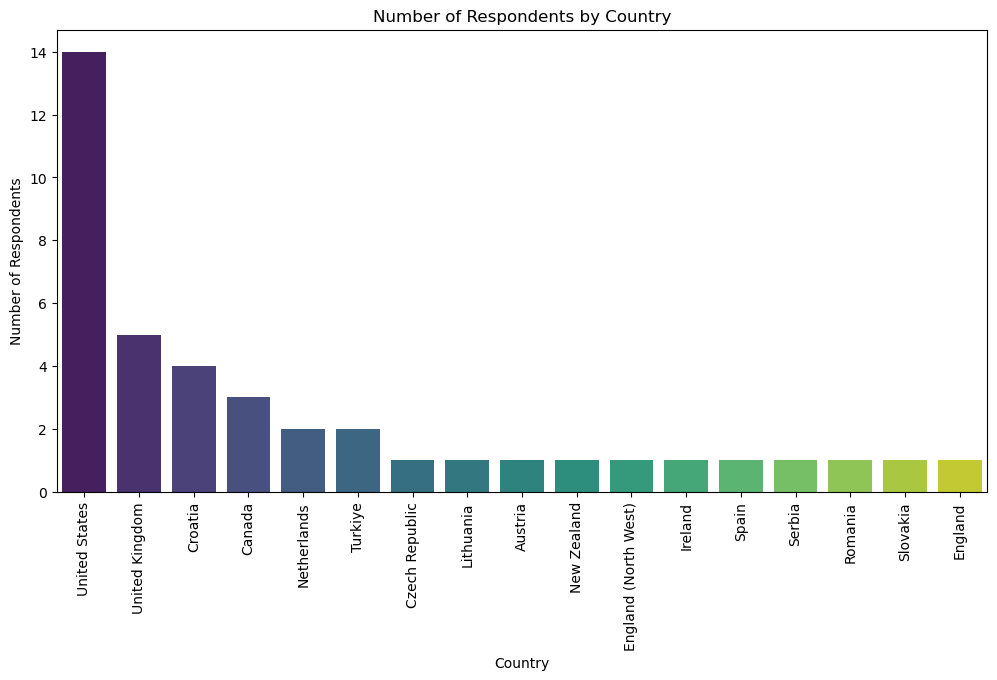

In [9]:
# 1. Which country most populated the form?
country_counts = data['From which country do you come from'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Number of Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.show()

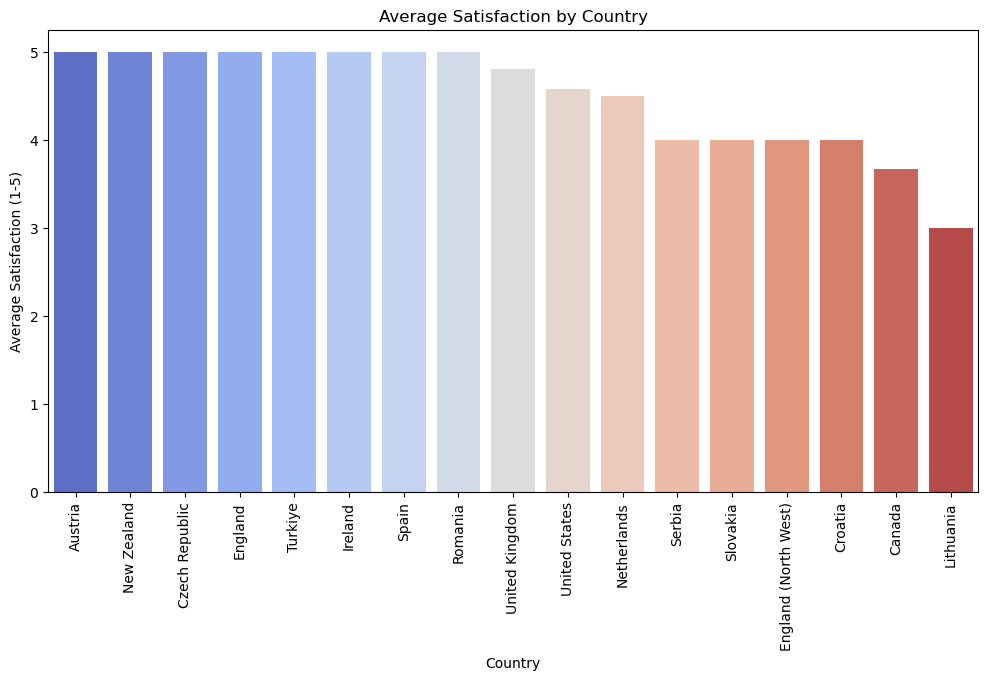

In [10]:
# 2. Which country is most satisfied?
satisfaction_column = 'How satisfied were you with overall tourism experience in Bosnia and Herzegovina?\n(Where 1 is the lowest and 5 is hightest) '
avg_satisfaction_by_country = data.groupby('From which country do you come from')[satisfaction_column].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_satisfaction_by_country.index, y=avg_satisfaction_by_country.values, palette='coolwarm')
plt.title('Average Satisfaction by Country')
plt.xlabel('Country')
plt.ylabel('Average Satisfaction (1-5)')
plt.xticks(rotation=90)
plt.show()

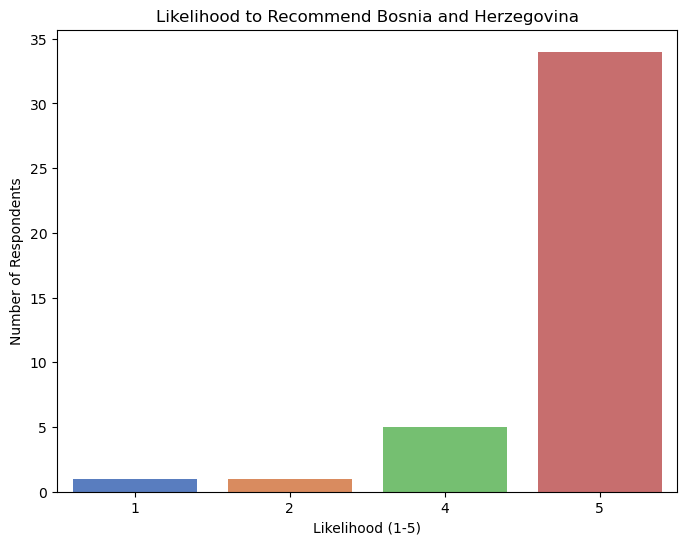

In [11]:
# 3. Likelihood to recommend Bosnia and Herzegovina as a tourist destination
recommend_column = 'How likely are you to recommend Bosnia and Herzegovina as a tourist destination to friends and family? ( Where 1 is the lowest and 5 is hightest) '
recommend_counts = data[recommend_column].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=recommend_counts.index, y=recommend_counts.values, palette='muted')
plt.title('Likelihood to Recommend Bosnia and Herzegovina')
plt.xlabel('Likelihood (1-5)')
plt.ylabel('Number of Respondents')
plt.show()


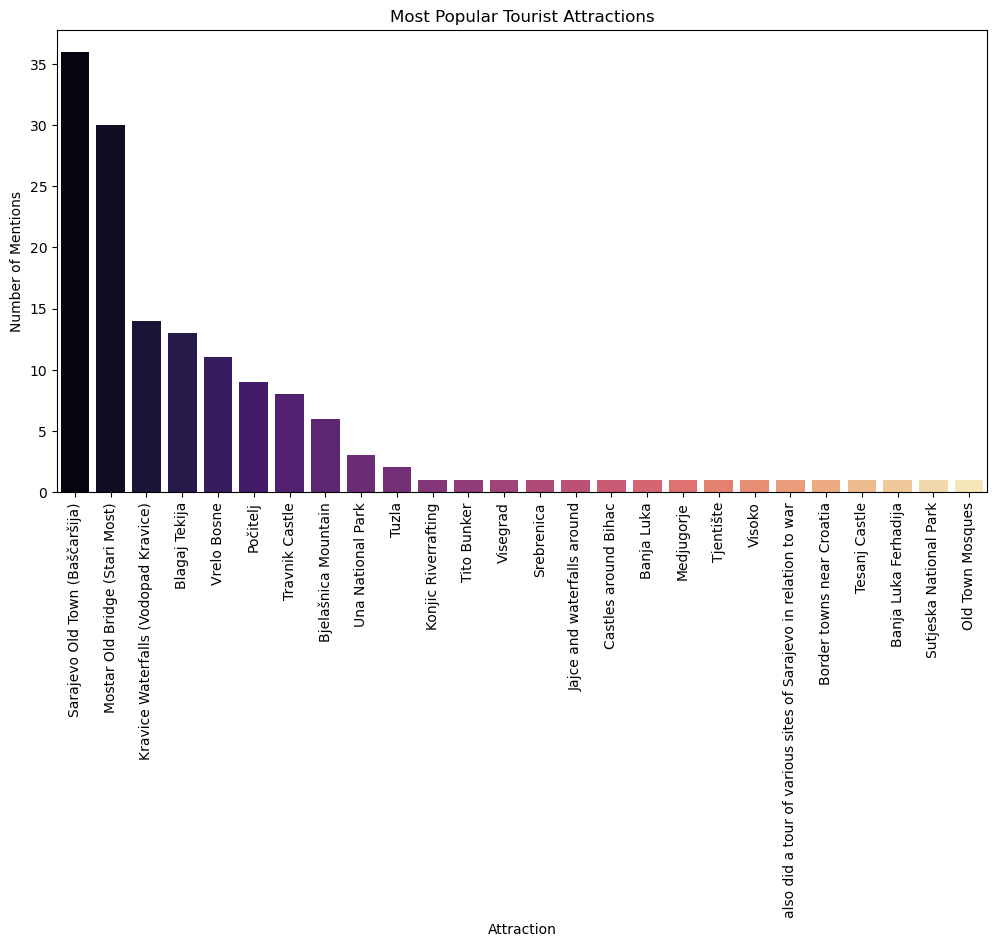

In [12]:
# 4. Most popular tourist attractions
attractions_column = 'If yes, please select tourist attractions you visited (Select all that apply)'
all_attractions = data[attractions_column].str.split(',').explode().str.strip()
attraction_counts = all_attractions.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=attraction_counts.index, y=attraction_counts.values, palette='magma')
plt.title('Most Popular Tourist Attractions')
plt.xlabel('Attraction')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.show()

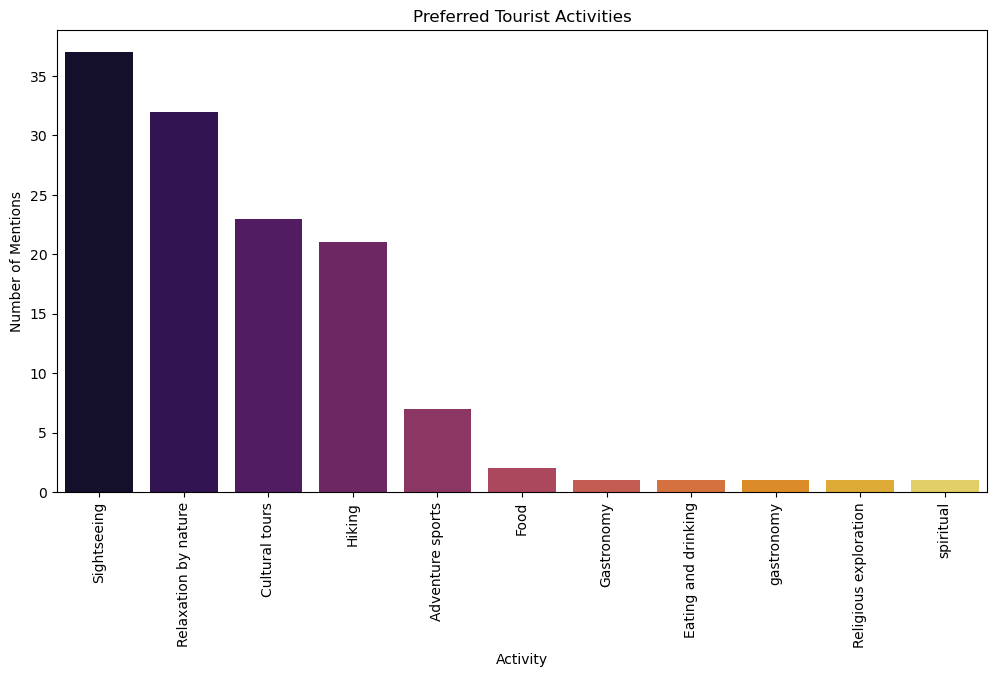

In [13]:
# 5. Preferred tourist activities
activities_column = 'What types of tourist activities do you enjoy the most in Bosnia and Herzegovina? (Select all that apply'
all_activities = data[activities_column].str.split(',').explode().str.strip()
activity_counts = all_activities.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette='inferno')
plt.title('Preferred Tourist Activities')
plt.xlabel('Activity')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.show()

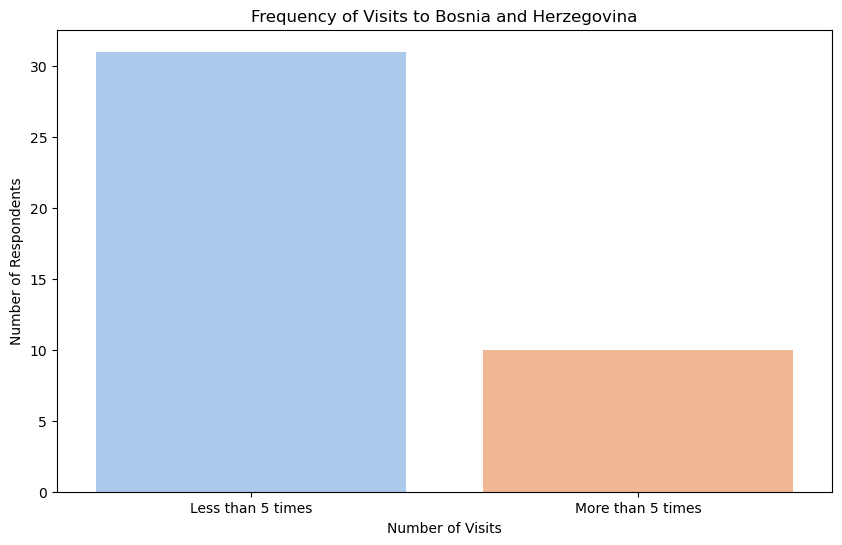

In [15]:
# 6. Frequency of Visits
visit_frequency_column = 'How many times have you visited Bosnia and Herzegovina?'
visit_counts = data[visit_frequency_column].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=visit_counts.index, y=visit_counts.values, palette='pastel')
plt.title('Frequency of Visits to Bosnia and Herzegovina')
plt.xlabel('Number of Visits')
plt.ylabel('Number of Respondents')
plt.show()

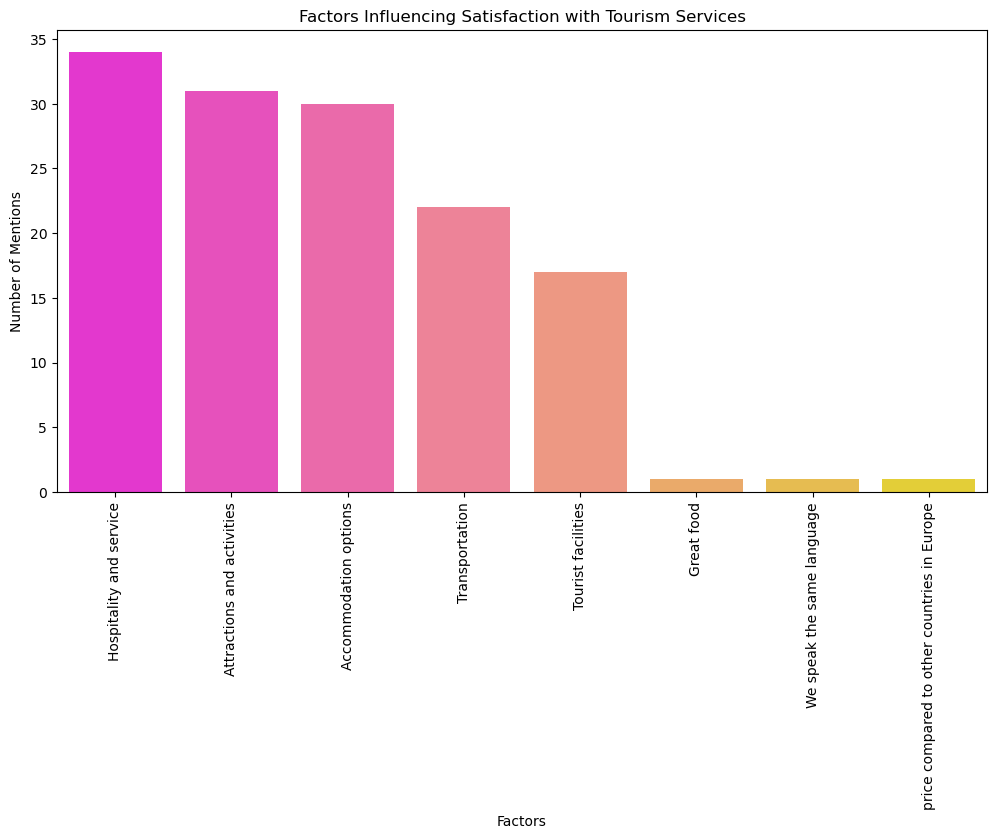

In [17]:
# 7. Factors Influencing Satisfaction
factors_column = 'What factors influence your satisfaction with tourism services? (Select all that apply)'
all_factors = data[factors_column].str.split(',').explode().str.strip()
factor_counts = all_factors.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=factor_counts.index, y=factor_counts.values, palette='spring')
plt.title('Factors Influencing Satisfaction with Tourism Services')
plt.xlabel('Factors')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.show()

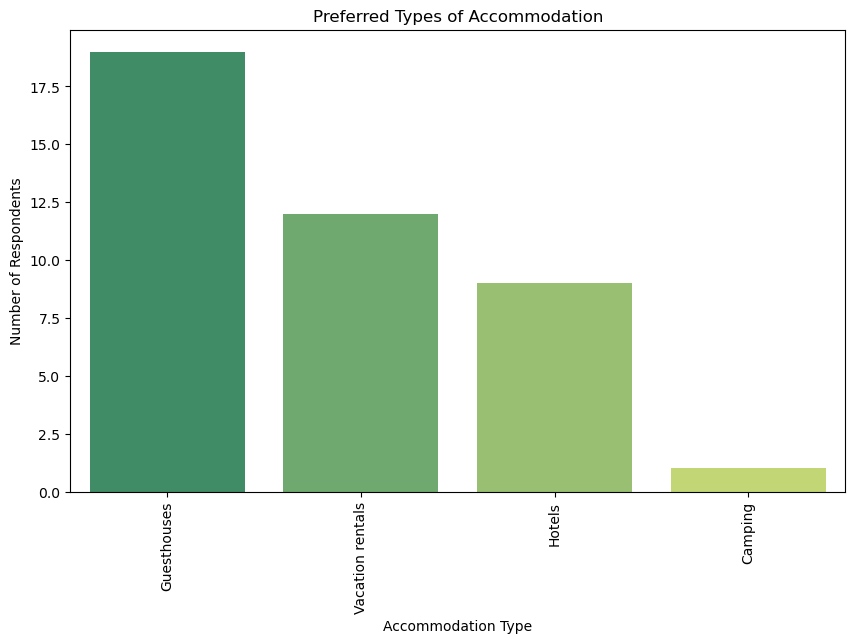

In [18]:
# 8. Preferred Accommodation Types
accommodation_column = 'What type of accommodation you prefer?'
accommodation_counts = data[accommodation_column].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=accommodation_counts.index, y=accommodation_counts.values, palette='summer')
plt.title('Preferred Types of Accommodation')
plt.xlabel('Accommodation Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.show()

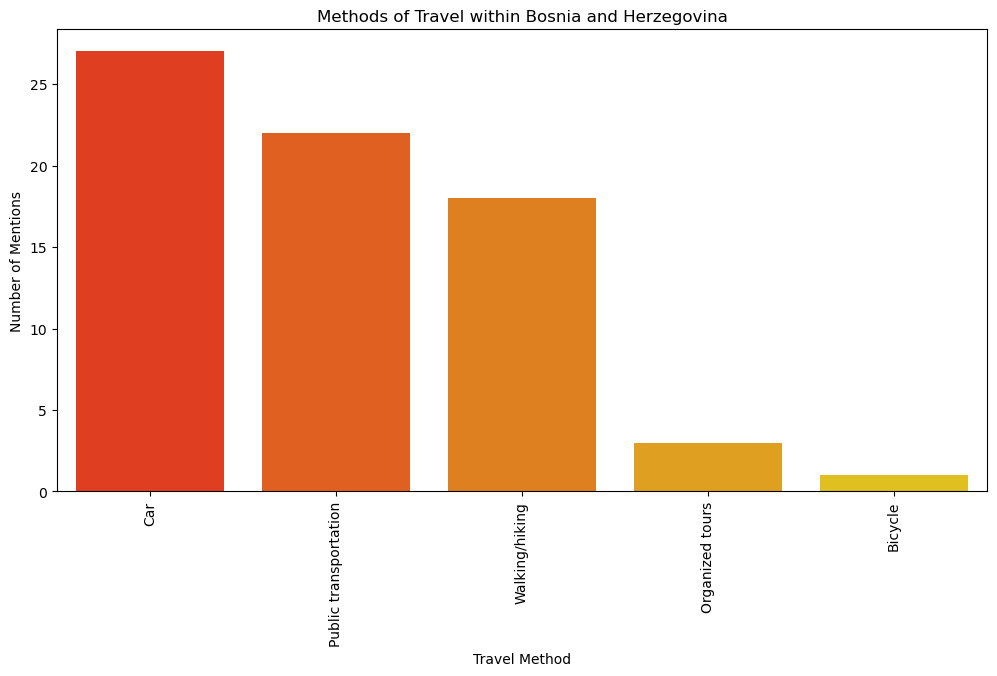

In [19]:
# 9. Travel Methods
travel_methods_column = 'How do you typically travel to tourist destinations within Bosnia and Herzegovina? (Select all that apply)'
all_travel_methods = data[travel_methods_column].str.split(',').explode().str.strip()
travel_method_counts = all_travel_methods.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=travel_method_counts.index, y=travel_method_counts.values, palette='autumn')
plt.title('Methods of Travel within Bosnia and Herzegovina')
plt.xlabel('Travel Method')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.show()

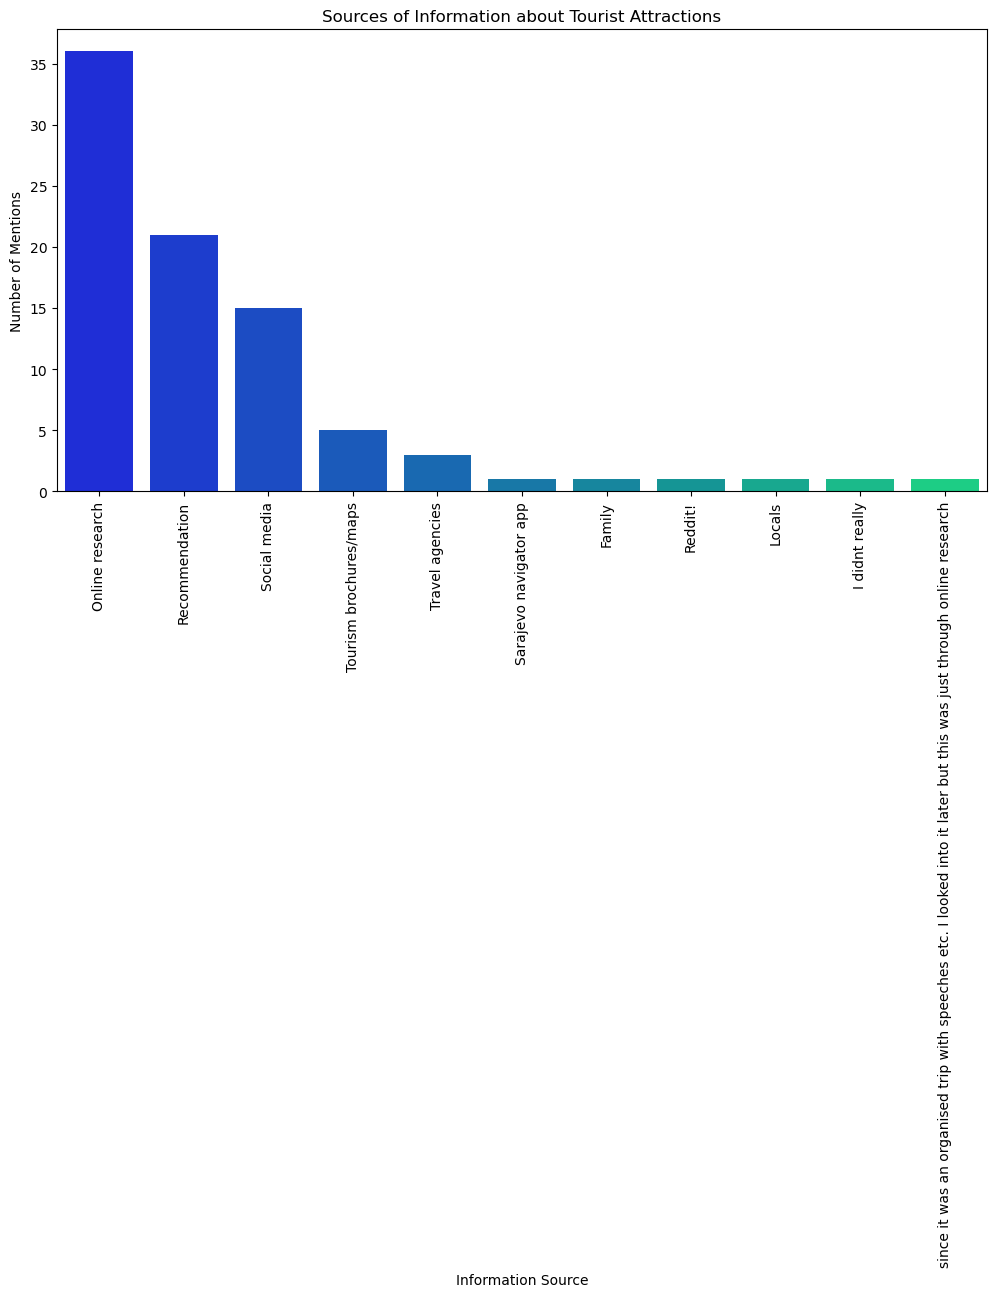

In [20]:
info_sources_column = 'How do you usually find information about tourist attractions and activities in Bosnia and Herzegovina? (Select all that apply)'
all_info_sources = data[info_sources_column].str.split(',').explode().str.strip()
info_source_counts = all_info_sources.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=info_source_counts.index, y=info_source_counts.values, palette='winter')
plt.title('Sources of Information about Tourist Attractions')
plt.xlabel('Information Source')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.show()

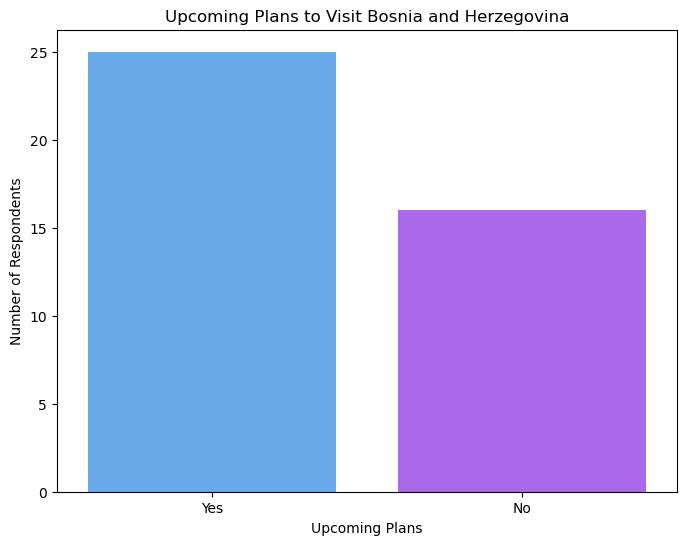

In [21]:
# 11. Upcoming Plans to Visit
plans_to_visit_column = 'Do you have any upcoming plans to visit tourist attractions within Bosnia and Herzegovina?'
plans_counts = data[plans_to_visit_column].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=plans_counts.index, y=plans_counts.values, palette='cool')
plt.title('Upcoming Plans to Visit Bosnia and Herzegovina')
plt.xlabel('Upcoming Plans')
plt.ylabel('Number of Respondents')
plt.show()

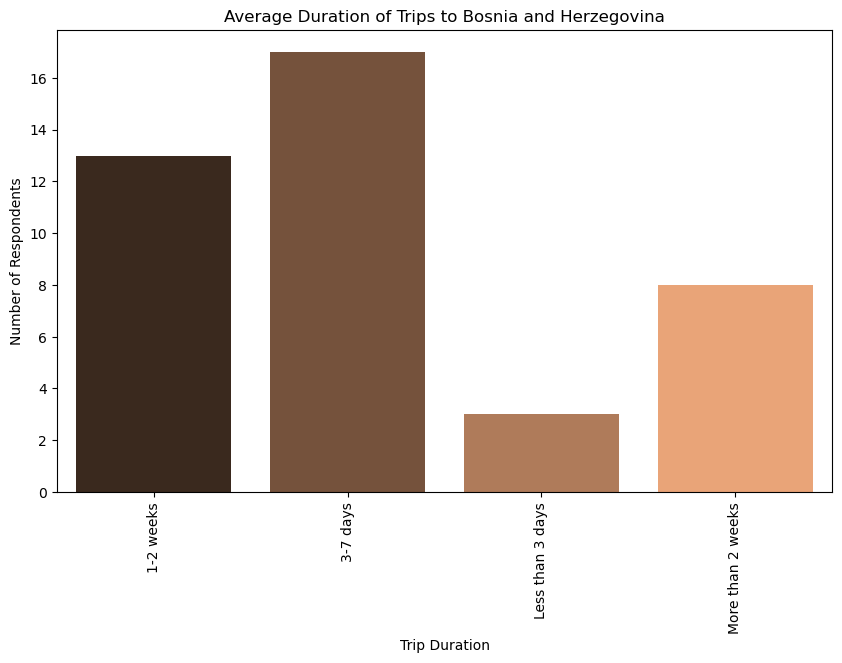

In [22]:
# 12. Trip Duration
trip_duration_column = 'What is the average duration of your trips to Bosnia and Herzegovina?'
trip_duration_counts = data[trip_duration_column].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=trip_duration_counts.index, y=trip_duration_counts.values, palette='copper')
plt.title('Average Duration of Trips to Bosnia and Herzegovina')
plt.xlabel('Trip Duration')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.show()

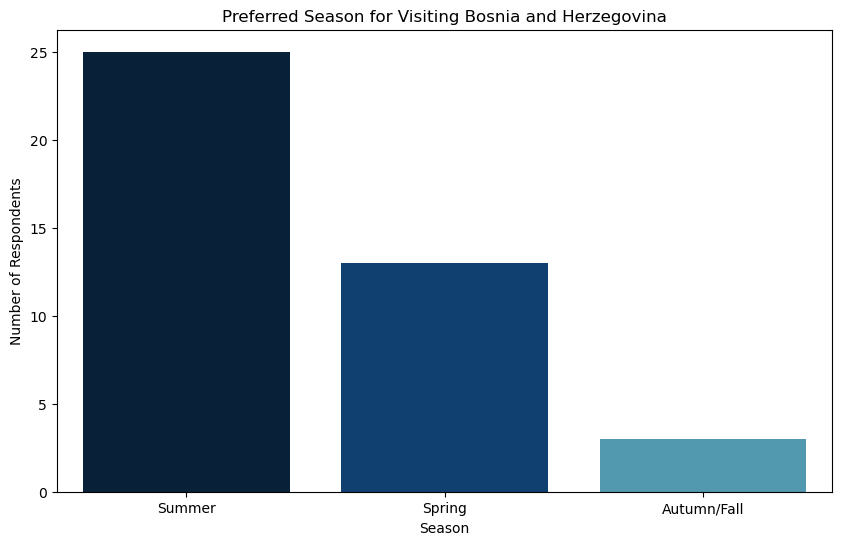

In [23]:
# 13. Preferred Season for Visits
preferred_season_column = 'During which season do you prefer to visit Bosnia and Herzegovina for tourism purposes?'
season_counts = data[preferred_season_column].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='ocean')
plt.title('Preferred Season for Visiting Bosnia and Herzegovina')
plt.xlabel('Season')
plt.ylabel('Number of Respondents')
plt.show()

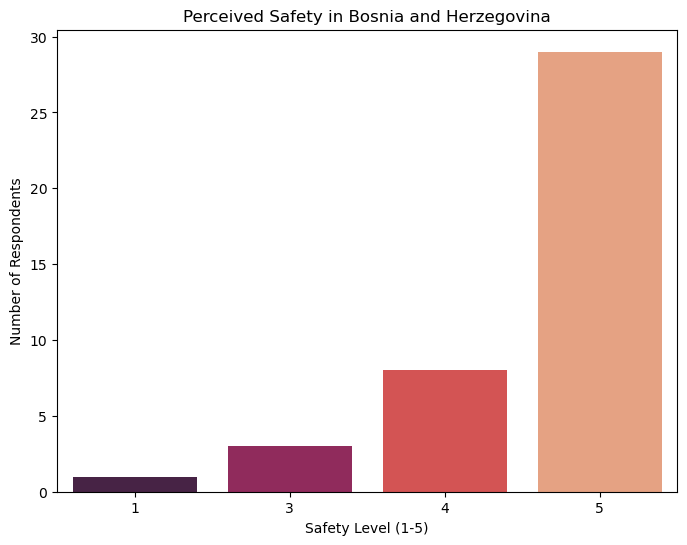

In [24]:
# 14. Perceived Safety
safety_column = 'How safe do you feel when traveling to tourist destinations in Bosnia and Herzegovina? ( Where 1 is the lowest and 5 is hightest) '
safety_counts = data[safety_column].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=safety_counts.index, y=safety_counts.values, palette='rocket')
plt.title('Perceived Safety in Bosnia and Herzegovina')
plt.xlabel('Safety Level (1-5)')
plt.ylabel('Number of Respondents')
plt.show()

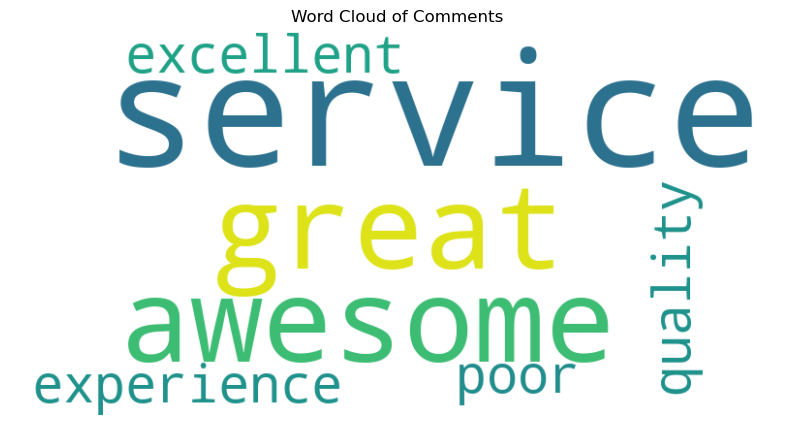

In [34]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example data (replace with your actual data loading code)
data = pd.DataFrame({'comments': ['great service', 'awesome experience', 'poor quality', 'excellent service']})

# Name of the column containing comments
comments_column = 'comments'

# Combine all comments into one string
all_comments = ' '.join(data[comments_column].astype(str))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Comments')
plt.show()
